# 1. Introduction

Welcome to the Lab5. In this lab, you will build a convolutional neural network step by step. In this notebook, you will implement all the functions required to build a convolutional neural network.

After finishing this lab, you will have a deeper understanding of the process of training a convolutional neural network, which mainly consists of two parts: convolution layer and pooling layer.

# 2. Import Packages

1. To build a convolutional neural network, we start by importing the Dense layer, Activation layer, and Loss function that you implemented in Lab4. Ensure the following three files are located in the same directory as this notebook, and follow the instructions to complete the setup:
    - Dense.py : Copy the **Dense class** you had implemented in Lab4 to it.
    - Activation.py : Copy the **Activation class** you had implemented in Lab4 to it.
    - Loss.py : Copy **compute_BCE_loss** function you had implemented in Lab4 to it.

2. Helper function
    - Predict.py : This file contains a helper function for model prediction and evaluation. **No modifications are required** for this file.

⚠️ **WARNING** ⚠️:
*   Please do not import any other packages in this lab.
*   np.random.seed(seed) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed.

❗ **Important** ❗: Please do not change the code outside this code bracket.
```
### START CODE HERE ### (≈ n lines)
...
### END CODE HERE ###
```



Mount Google Drive (optional)

In [2]:
### START CODE HERE ###
# from google.colab import drive
# drive.mount('/content/drive')
### END CODE HERE ###

In [3]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

###### import your HW4 code######
from Dense import Dense
from Activation import Activation
from Loss import compute_BCE_loss
from Predict import predict
##################################

output = {}
seed = 1
np.random.seed(seed)

# 3. Basic part

## 3.1 Convolution layer

Convolution layer enables us to capture the important features of input images.

In this section, we will focus on convolution layer. The implemented function will be gradually incorporated into this class, so you should use self.function() whenever you need to call it.

### 3.1.1 Initialize the Convolution layer

First, we initialize the Convolution layer and set up the weights and biases of the convolutional filters using Glorot uniform initialization.

- It will take following parameters to initialize the convolution layer:

    *   filter_size: Defines the dimensions of the filter, which will be of shape (filter_size x filter_size).
    
    *   input_channel: Specifies the size of the input channel.
    
    *   output_channel: Specifies the size of the output channel.
    
    *   pad: The amount of padding applied around each image along the vertical and horizontal dimensions.
    
    *   stride: The number of steps the filter moves during each operation.
    
**Note: No implementation is required for this section.**

In [4]:
class Conv():
    def __init__(self, filter_size=2, input_channel=3, output_channel=8, pad=1, stride=1, seed=1):

        self.filter_size= filter_size
        self.input_channel=input_channel
        self.output_channel=output_channel
        self.seed = seed
        self.pad = pad
        self.stride = stride

        self.parameters = {'W':None, 'b': None}
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (filter_size, filter_size, input channel size, output channel size)
                           b -- bias vector of shape (1, 1, 1, output channel size)
        """
        np.random.seed(seed)
        sd = np.sqrt(6.0 / (self.input_channel + self.output_channel))
        W = np.random.uniform(-sd, sd, (self.filter_size,self.filter_size,self.input_channel,self.output_channel))
        b = np.zeros((1, 1, 1, self.output_channel))

        assert(W.shape == (self.filter_size,self.filter_size,self.input_channel,self.output_channel))
        assert(b.shape == (1,1,1,self.output_channel))

        self.parameters['W'] = W
        self.parameters['b'] = b

### 3.1.2 Zero-Padding

Implement the zero_pad() function to pad the input X with the given parameter on vertical and horizontal dimensions with zero.

- It allows you to use a convolution layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks since otherwise the height/width would shrink as you go to deeper layers.

- It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.

**Note:** This function is **not included** as a method in the Conv class, so you can call zero_pad() directly whenever you need to use it.

**Hint:** You can use function [np.pad](https://numpy.org/doc/2.0/reference/generated/numpy.pad.html) to add the specified amount of zero-padding around image on both the vertical and horizontal dimensions.

In [5]:
def zero_pad(X, pad):
    """
    Pad all images in the dataset X with zeros. The padding should be applied to both the height and width of each image.

    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C), where m represent the number of examples.
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ###
    X_pad = np.pad(X,pad_width=((0,0),(pad,pad),(pad,pad),(0,0)),mode='constant', constant_values=0)
    # print(X_pad.shape)
    ### END CODE HERE ###

    return X_pad

#### **Test and Evaluate** the **zero_pad** function

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[0,2,:,0] = [-0.3224172   1.13376944 -0.17242821]
x_pad[0,2,:,0] = [ 0.          0.          1.62434536 -0.52817175  0.86540763  0.
  0.        ]


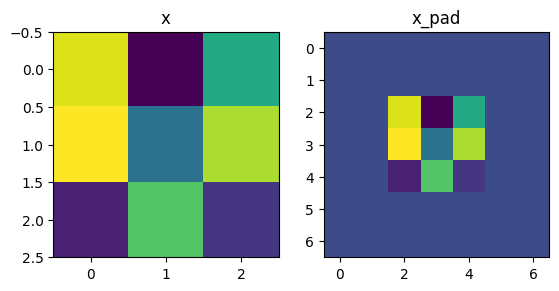

In [6]:
np.random.seed(seed)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[0,2,:,0] =", x[0,2,:,0])
print ("x_pad[0,2,:,0] =", x_pad[0,2,:,0])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

np.random.seed(seed)
x = np.random.randn(4, 2, 2, 2)
x_pad = zero_pad(x, 1)
output["zero_padding"] = x_pad[0,1,:,0]

Expected output:
<table>
  <tr>
    <td>x.shape: </td>
    <td>(4, 3, 3, 2)</td>
  </tr>
  <tr>
    <td>x_pad.shape: </td>
    <td>(4, 7, 7, 2)</td>
  </tr>
  <tr>
    <td>x[0,2,:,0]: </td>
    <td>[-0.3224172   1.13376944 -0.17242821]</td>
  </tr>
  <tr>
    <td>x_pad[0,2,:,0]: </td>
    <td>[ 0. 0. 1.62434536 -0.52817175 0.86540763 0. 0.]
</td>
  </tr>
</table>

### 3.1.3 Convolution Single Step

In this section, you will implement the **conv_single_step** function which will apply a filter to a single region f * f of the input data.

<span style="font-size: 25px;">Key Concepts</span>

* Convolution is performed using a sliding window of size f * f, where f is the filter size.
  
* This function applies a convolution filter of dimensions (f, f, n_c_prev) on an input slice of shape (f, f, n_c_prev), resulting in a single scalar value.

* In section 3.1.4, we would slide the filter along (H,W) coordinate to get a 2D feature map for the filter

<span style="font-size: 25px;">Steps in the conv_single_step implementation</span>

1. **Step 1:** Do element-wise product to a_slice_prev and W to get shape (f, f, n_c_prev).
   
2. **Step 2:** Sum all values to get a single scalar, reducing the (f, f, n_C_prev) matrix into a single scalar.
   
3. **Step 3:** Add the bias b to the scalar result. Cast b to a float() so that Z results in a scalar value.

In [7]:
def conv_single_step(self, a_slice_prev, W, b):
        """
        Arguments:
        a_slice_prev -- slice of previous activation layer output with shape (filter_size, filter_size, n_C_prev)
        W -- Weight parameters contained in a window - matrix of shape (filter_size, filter_size, n_C_prev)
        b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

        Returns:
        Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
        """

        ### START CODE HERE ### (≈ 3 lines)
        # Step 1: Element-wise product to a_slice_prev and W
        Conv_single = a_slice_prev * W
        # Step 2: Sum all values to get a single scalar
        Conv_sum = np.sum(Conv_single)
        # Step 3: Add the bias
        # print(b)
        if b.ndim > 0:
            b=b.item()
        Z = Conv_sum + float(b)
        ### END CODE HERE ###

        return Z

Conv.conv_single_step = conv_single_step

#### **Test and Evaluate** the **conv_single_step** function

In [8]:
np.random.seed(seed)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

conv = Conv(filter_size=2, input_channel=3, output_channel=8, pad=2, stride=2)
Z = conv.conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

np.random.seed(seed)
a_slice_prev = np.random.randn(3, 3, 3)
W = np.random.randn(3, 3, 3)
b = np.random.randn(1, 1, 1)
conv = Conv()
Z = conv.conv_single_step(a_slice_prev, W, b)
output["conv_single_step"] = Z

Z = -6.999089450680221


Expected output:
<table>
  <tr>
    <td>Z: </td>
    <td>-6.999089450680221</td>
  </tr>
</table>

### 3.1.4 Forward Pass

In this section, you will take multiple filters and convolve them through the input. Each filter produces a 2D matrix output, and stacking these matrices creates a 3D output volume.

The **conv_single_step** function is essential for this process. During the **Forward pass**, we call **conv_single_step** repeatedly on different slices of the input along (H,W) coordinate to build the entire 2D output matrix for each filter. This involves the following steps:

**Step 1: Calculate the Output Dimension**:
   
- The final output of the convolution operation is a 3D volume with dimensions (n_H, n_W, n_C):

  - Height: n_H $= \left\lfloor \frac{H_{prev} - filter\_size + 2 \times \text{pad}}{\text{stride}} \right\rfloor + 1$

  - Width: n_W $= \left\lfloor \frac{W_{prev} - filter\_size + 2 \times \text{pad}}{\text{stride}} \right\rfloor + 1$

  - Depth: n_C, which is the number of filters

**Step 2: Padding**:

- Pad the input based on the padding value to ensure that we correctly calculate the output volumn for each position.

**Step 3: Loop Through Training Examples**:

The input data has dimensions (m, n_H_prev, n_W_prev, n_C_prev), where m represents the number of input data.

For each training example, follow these steps to compute the output volumn:

- **Step 3-1: Extracting slices**:

  - For each position (h, w, c) in the output matrix, we define a slice of the input within the sliding window where each slice has dimensions (f, f, n_C_prev).

  - In each operation, we slide the window with a defined stride along the (H, W) coordinates to extract different slice.

- **Step 3-2: Applying Filters**:

  - For each slice of shape (f, f, n_C_prev), we apply a filter also of shape (f, f, n_C_prev) using **conv_single_step**.

  - This element-wise multiplication and summation over the entire slice and filter result in a single scalar output, reducing (f, f, n_C_prev) to (1, 1, 1).

  - By iterating over all positions (h, w) across the height and width of the input, **conv_single_step** computes the result at each position, building up a 2D matrix of size (n_H, n_W) for each filter.

  - By iterating over all filters (which correspond to the output channels), we build up a 3D output volume of shape (n_H, n_W, n_C), where n_C is the number of filters used in the layer.

In [9]:
def forward(self, A_prev):
    """
    Implements the forward propagation for a convolution layer

    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    """

    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    # print((m, n_H_prev, n_W_prev, n_C_prev),A_prev.shape)
    # print(A_prev.shape)
    # print(self.parameters['W'].shape)
    # Retrieve dimensions from W's shape
    # W = self.parameters['W']
    # b = self.parameters['b']
    W,b = self.parameters['W'],self.parameters['b']
    # print(b)
    (f, f, n_C_prev, n_C) = W.shape


    # Step 1: Output Dimension Calculation
    pad = self.pad
    stride = self.stride
    n_H = (n_H_prev - f + 2*pad)//stride + 1
    n_W = (n_W_prev - f + 2*pad)//stride + 1

    # Initialize the output volume Z with zeros
    Z = np.zeros((m,n_H,n_W,n_C))

    # Step 2: Padding
    A_prev_pad = zero_pad(A_prev,pad=pad)

    # Step 3: Loop Through Training Examples
    for i in range(m):                                 # loop over the batch of training examples
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filter) of the output volume


                    # Step 3-1: Extracting slices
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    a_slice_prev = A_prev_pad[i,vert_start:vert_end,horiz_start:horiz_end,:]

                    # Step 3-2: Applying Filters
                    # print(a_slice_prev.shape,W[:,:,:,c].shape,b[:,:,:,c].shape)
                    Z[i,h,w,c] = self.conv_single_step(a_slice_prev,W[:,:,:,c],b[:,:,:,c])

    ### END CODE HERE ###

    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))

    # Save information in "cache" for the backward pass
    self.cache = A_prev

    return Z

Conv.forward = forward

#### **Test and Evaluate** the **forward** function

In [10]:
np.random.seed(seed)
A_prev = np.random.randn(10,4,4,3)
conv=Conv(filter_size=2, input_channel=3, output_channel=8, pad=2, stride=2)
Z = conv.forward(A_prev)

print("Z's shape =", Z.shape)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])


np.random.seed(seed)
A_prev = np.random.randn(10,3,3,2)
conv=Conv(filter_size=3, input_channel=2, output_channel=16, pad=1, stride=1)
Z = conv.forward(A_prev)

output["conv_forward_1"] = Z.shape
output["conv_forward_2"] = np.mean(Z)
output["conv_forward_3"] = Z[3,2,1]

Z's shape = (10, 4, 4, 8)
Z's mean = 0.0031904169881830898
Z[3,2,1] = [ 1.32947002  2.12083471  0.37853495 -3.53602735  1.38816885 -1.01503137
 -1.01667531  0.86993377]


Expected output:
<table>
  <tr>
    <td>Z's shape: </td>
    <td>(10, 4, 4, 8)</td>
  </tr>
  <tr>
    <td>Z's mean: </td>
    <td>0.0031904169881830785</td>
  </tr>
  <tr>
    <td>Z[3,2,1]: </td>
    <td>[ 1.32947002  2.12083471  0.37853495 -3.53602735  1.38816885 -1.01503137
 -1.01667531  0.86993377]</td>
  </tr>
</table>

### 3.1.5 Backward Pass

In this section, we calculate the gradients of the cost function with respect to the input, weights, and biases of the convolutional layer. This allows us to update these parameters during training. The backward pass involves the following gradients:

- **dA_prev**: Gradient of the cost with respect to the input of the conv layer, with dimensions (m, n_H_prev, n_W_prev, n_C_prev).
  
- **dW**: Gradient of the cost with respect to the weights of the conv layer, with dimensions (f, f, n_C_prev, n_C).
  
- **db**: Gradient of the cost with respect to the biases of the conv layer, with dimensions (1, 1, 1, n_C).

<span style="font-size: 25px;">Backward Pass Steps</span>

Given the gradient of the cost with respect to the output of the convolutional layer, dZ, which has dimensions (m, n_H, n_W, n_C), the backward pass proceeds as follows:

**Step 1: Initialize Gradients**:

- Create dA_prev, dW, and db with the correct shapes

**Step 2: Padding**:

- Pad A_prev and dA_prev based on the padding value to ensure that we correctly calculate the gradients for each position

**Step 3: Loop Through Training Examples**:

For each training example, follow these steps to compute and update the gradients:

- **Step 3-1: Extracting slices**:

  - This step is the same as what you have implemented in **Forward pass**. The slice is used to calculate the gradient of filter's weight.

- **Step 3-2: Update the Gradients**:

    $$
  dA^{l-1} = \frac{\partial L}{\partial Z^l} \times \frac{\partial Z^l}{\partial A^{l-1}} = \frac{\partial L}{\partial A^{l-1}}
  $$

  $$
  dW^l = \frac{1}{m} \times \frac{\partial L}{\partial Z^l} \times \frac{\partial Z^l}{\partial W^l} = \frac{\partial L}{\partial W^l}
  $$

  $$
  db^l = \frac{1}{m} \times \frac{\partial L}{\partial Z^l} \times \frac{\partial Z^l}{\partial b^l} = \frac{\partial L}{\partial b^l}
  $$

  **Hint:**
  - $ \frac{\partial L}{\partial Z^l} $ corresponds to $ dZ $
  - m is the batch size
  - $ Z_{h,w,c}^l = A_{f \times f}^{l-1} * W_{c}^l + b_{c}^l $ , where f is the kernel size
  
  Iterating over the height, width, and channels of the output to compute the full set of gradients.

**Step 4: Remove Padding**:
- After calculating the gradients for all slices, remove the padding from dA_prev_pad to obtain dA_prev with shape (m, n_H_prev, n_W_prev, n_C_prev).


In [11]:
def backward(self, dZ):
    """
    Implement the backward propagation for a convolution layer

    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)

    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
                numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    """


    A_prev = self.cache

    ### START CODE HERE ###

    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve dimensions from W's shape
    W,b = self.parameters['W'],self.parameters['b']
    (f, f, n_C_prev, n_C) = W.shape

    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape

    # Step 1: Initialize Gradients
    dA_prev = np.zeros(A_prev.shape)
    dW = np.zeros(W.shape)
    db = np.zeros((1,1,1,n_C))

    # Step 2: Padding
    A_prev_pad = zero_pad(A_prev,pad=self.pad)
    dA_prev_pad = zero_pad(dA_prev,pad=self.pad)
    pad = self.pad
    # Step 3: Loop Through Training Examples
    for i in range(m):                         # loop over the batch of training examples
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume

                    # Step 3-1: Extracting slices
                    vert_start = h * self.stride
                    vert_end = vert_start + f
                    horiz_start = w * self.stride
                    horiz_end = horiz_start + f
                    a_slice = A_prev_pad[i,vert_start:vert_end,horiz_start:horiz_end,:]

                    # Step 3-2: Update the Gradients
                    # Z[i,h,w,c] = self.conv_single_step(a_slice_prev,W[:,:,:,c],b[:,:,:,c])
                    # print(dA_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end,:].shape,dZ[i,h,w,c].shape, W[:,:,:,c].shape," : ",c," , ",dA_prev_pad.shape,dZ.shape)
                    # print((dZ[i,h,w,c] * W[:,:,:,c]).shape)
                    dA_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end,:] += ((dZ[i,h,w,c] * W[:,:,:,c]))
                    dW[:,:,:,c] += 1/(m) * ((dZ[i,h,w,c] * a_slice))#self.conv_single_step(a_slice,W[:,:,:,c],b[:,:,:,c]))
                    db[:,:,:,c] += 1/(m) * (dZ[i,h,w,c])

        # Step 4: Remove Padding
        # print(dA_prev[i,:,:,:].shape,dA_prev_pad[i,h,w,:].shape)
        dA_prev[i, :, :, :] = dA_prev_pad[i,pad:-pad,pad:-pad,:]

    ### END CODE HERE ###

    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))

    self.dW = dW
    self.db = db

    return dA_prev

Conv.backward = backward

#### **Test and Evaluate** the **backward** function

In [37]:
np.random.seed(seed)
dZ = np.random.randn(10,4,4,8)
conv = Conv(filter_size=2, input_channel=3, output_channel=8, pad=2, stride=2)
conv.cache = np.random.randn(10,4,4,3)
dA_prev = conv.backward(dZ)

print("dA_prev's shape =", dA_prev.shape)
print("dA_prev's mean =", np.mean(dA_prev))
print("dA_prev[3,2,1] =", dA_prev[3,2,1])
print("dW[0,0,0,:] =", conv.dW[0,0,0,:])
print("db[0,0,0,:] =", conv.db[0,0,0,:])


np.random.seed(seed)
dZ = np.random.randn(10,3,3,16)
conv = Conv(filter_size=3, input_channel=2, output_channel=16, pad=1, stride=1)
conv.cache = np.random.randn(10,3,3,2)
dA_prev = conv.backward(dZ)

output["conv_backward_1"] = dA_prev.shape
output["conv_backward_2"] = np.mean(dA_prev)
output["conv_backward_3"] = dA_prev[3,2,1]

dA_prev's shape = (10, 4, 4, 3)
dA_prev's mean = 0.006550676363290898
dA_prev[3,2,1] = [-0.33079703 -1.64413855  0.34342549]
dW[0,0,0,:] = [ 0.628421    0.27688478 -0.15725264  0.60455304  0.16843747  1.00921225
  0.55441834  0.1224805 ]
db[0,0,0,:] = [ 2.83837596  1.10463954  0.17494534  0.94603986 -1.05306856 -0.45070565
  0.15993941  1.32191626]


Expected output:
<table>
  <tr>
    <td>dA_prev's shape: </td>
    <td>(10, 4, 4, 3)</td>
  </tr>
  <tr>
    <td>dA_prev's mean: </td>
    <td>0.00655067636329092</td>
  </tr>
  <tr>
    <td>Z[3,2,1]: </td>
    <td>[-0.33079703 -1.64413855  0.34342549]</td>
  </tr>
  <tr>
    <td>dW[0,0,0,:]: </td>
    <td>[ 0.628421    0.27688478 -0.15725264  0.60455304  0.16843747  1.00921225, 0.55441834  0.1224805 ]</td>
  </tr>
  <tr>
    <td>db[0,0,0,:]: </td>
    <td>[ 2.83837596  1.10463954  0.17494534  0.94603986 -1.05306856 -0.45070565 0.15993941  1.32191626]</td>
  </tr>
</table>

### 3.1.6 Update parameters
In this section, you will update the parameters of the convolution layer, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

In [13]:
def update(self, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    learning rate -- step size
    """

    ### START CODE HERE ###
    self.parameters["W"] -= learning_rate * self.dW
    self.parameters["b"] -= learning_rate * self.db
    ### END CODE HERE ###

Conv.update = update

#### **Test and Evaluate** the **update** function

In [14]:
conv=Conv(filter_size=2, input_channel=3, output_channel=5, pad=2, stride=2)
np.random.seed(seed)
conv.dW = np.random.randn(2, 2, 3, 5)
conv.db = np.random.randn(1, 1, 1, 5)
conv.update(1.0)
print("W[0,0,0:2] = ", conv.parameters["W"][0,0,0:2])
print("b = ", conv.parameters["b"])

conv=Conv(filter_size=3, input_channel=3, output_channel=5, pad=2, stride=2)
np.random.seed(seed)
conv.dW = np.random.randn(3, 3, 3, 5)
conv.db = np.random.randn(1, 1, 1, 5)
conv.update(1.0)
output["conv_update_1"] = conv.parameters["W"][0,0,0:2]
output["conv_update_2"] = conv.parameters["b"]


W[0,0,0:2] =  [[-1.76806747  0.99336963 -0.33765555  0.73059859 -1.47724437]
 [ 1.59544843 -2.28822502  0.49371023 -0.49784308  0.31660293]]
b =  [[[[ 0.75439794 -1.25286816 -0.51292982  0.29809284 -0.48851815]]]]


Expected output:
<table>
  <tr>
    <td>W[0,0,0:2]: </td>
    <td>[[-1.76806747  0.99336963 -0.33765555  0.73059859 -1.47724437][1.59544843 -2.28822502  0.49371023 -0.49784308  0.31660293]]</td>
  </tr>
  <tr>
    <td>b: </td>
    <td>[[[[ 0.75439794 -1.25286816 -0.51292982  0.29809284 -0.48851815]]]]</td>
  </tr>
</table>

## 3.2 Maxpooling layer

The pooling layer reduces the size (height and width) of the input. It helps reduce computation, as well as makes feature detectors more invariant to their position in the input.

In this section, we will focus on Maxpooling layer. The implemented function will be gradually incorporated into this class, so you should use self.function() whenever you need to call it.

### 3.2.1 Initialize the Maxpooling layer

First, we initialize the Maxpooling layer.

- It will take following parameters to initialize the Maxpooling layer:

    *   pool_size: Defines the dimensions of the pooling window, which will be of shape (pool_size x pool_size).
    
    *   stride: The number of steps the pooling window moves during each operation.

- Function **create_mask_from_window** is used in the backward pass to aid in backpropagating gradients through the pooling layer.
    
**Note: No implementation is required for this section.**

In [15]:
class MaxPool():
    def __init__(self, pool_size=2, stride=2):

        self.pool_size = pool_size
        self.stride = stride

    def create_mask_from_window(self, x):
        """
        Creates a mask from an input x to identify the max entry of x.

        Arguments:
        x -- Array of shape (filter_size, filter_size)

        Returns:
        mask -- Array of the same shape as filter, contains a True at the position corresponding to the max entry of x.
        """

        mask = x == np.max(x)

        return mask

### 3.2.2 Forward pass

In this section, you will slide a ( pool_size * pool_size ) window over the input and store the max value of the window in the output.

This involves the following steps:

**Step 1: Calculate the Output Dimension**
   
- The output of the maxpooling operation is of shape (n_H, n_W, n_C):

  - Height: n_H $= \left\lfloor \frac{H_{prev} - pool\_size}{\text{stride}} \right\rfloor + 1$

  - Width: n_W $= \left\lfloor \frac{W_{prev} - pool\_size}{\text{stride}} \right\rfloor + 1$

  - Depth: n_C_prev, which corresponds to the number of input channels

**Step 2: Loop Through Training Examples**

For each training example, follow these steps to perform maxpooling operation:
    
- **Step 2-1: Extracting slices**:

  - This step is the same as what you have implemented in **Conv.forward**, but now we extract only one channel at a time to perform the max-pooling operation.

- **Step 2-2: Applying Maxpooling**:
   
  - For each slice of shape (p, p , 1), calculate the maximum value from the slice.



In [16]:
def forward(self, A_prev):
    """
    Implements the forward pass of the max pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    """

    ### START CODE HERE ###
    # retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape


    # Step 1: Output Dimension Calculation
    pool_size = self.pool_size
    stride = self.stride
    n_H = (n_H_prev - pool_size) // stride + 1
    n_W = (n_W_prev - pool_size) // stride + 1
    n_C = n_C_prev

    # initialize output matrix A with zeros
    A = np.zeros((m,n_H,n_W,n_C))

    # Step 2: Loop Through Training Examples
    for i in range(m):                           # loop over the batch of training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume

                    # Step 2-1: Extracting slices
                    vert_start = h * stride
                    vert_end = vert_start + pool_size
                    horiz_start = w * stride
                    horiz_end = horiz_start + pool_size
                    a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,:]

                    # Step 2-2: Applying Maxpooling
                    max_c = np.max(a_prev_slice[:,:,c])
                    A[i,h,w,c] = max_c


    ### END CODE HERE ###

    # Store the input in "cache" for backward pass
    self.cache = A_prev

    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))

    return A

MaxPool.forward = forward

#### **Test and Evaluate** the **forward** function

In [17]:
np.random.seed(seed)
A_prev = np.random.randn(2, 4, 4, 3)
maxpool=MaxPool(pool_size=3, stride=2)
A = maxpool.forward(A_prev)
print("A =", A)

A_prev = np.random.randn(2, 5, 5, 3)
maxpool=MaxPool(pool_size=2, stride=1)
A = maxpool.forward(A_prev)
output["maxpool_forward"] = A

A = [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]


Expected output:
<table>
  <tr>
    <td>A: </td>
    <td>[[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]</td>
  </tr>
</table>

### 3.2.3 Backward Pass

In the backward pass, you will distribute the gradient from the output back to the input. The gradient will only pass through the location of the maximum value selected during the forward pass. During this process, the output gradient dA is propagated back to the input by identifying where the maximum value occurred in each pooling window.

<span style="font-size: 25px;">Backward Pass Steps</span>

Given the gradient of the cost with respect to the output of the pooling layer, dA, which has the same shape as A, the backward pass proceeds as follows:

**Step 1: Initialize Gradients**:

   - Create dA_prev with the correct shapes

**Step 2: Loop Through Training Examples**:

   For each training example, follow these steps to pass through the gradients:

   - **Step 3-1: Extracting slices**:

     - This step is the same as what you have implemented in **Forward pass**.

   - **Step 3-2: Pass through the Gradients**:

      - call **create_mask_from_window** and apply the mask to the input gradient to backpropagate only the location of  maximum value within the window.
      
      Iterating over the height, width, and channels of the output to compute the full set of gradients.


In [18]:
def backward(self, dA):
    """
    Implements the backward pass of the max pooling layer

    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A

    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """

    # Retrieve information from cache
    A_prev = self.cache

    ### START CODE HERE ###

    # Retrieve dimensions from A_prev's shape and dA's shape
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    pool_size = self.pool_size
    stride = self.stride

    # Step 1: Initialize Gradients
    dA_prev = np.zeros(A_prev.shape)

    # Step 2: Loop Through Training Examples
    for i in range(m):                           # loop over the batch of training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume

                    # Step 2-1: Extracting slices
                    vert_start = h * stride
                    vert_end = vert_start + pool_size
                    horiz_start = w * stride
                    horiz_end = horiz_start + pool_size
                    a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]

                    # Step 2-2: Pass through the Gradients
                    mask = self.create_mask_from_window(a_prev_slice)
                    # print(a_prev_slice.shape)
                    # print(mask)
                    # print(mask.shape,dA[i,h,w,:].shape)
                    # print("(dA[i,h,w,c]) : ",(dA[i,h,w,c]))
                    # print("(dA[i,h,w,c] * mask) : ",(dA[i,h,w,c] * mask))
                    dA_prev[i,vert_start:vert_end,horiz_start:horiz_end,c] += (dA[i,h,w,c] * mask)

    ### END CODE HERE ###

    # Make sure your output shape is correct

    assert(dA_prev.shape == A_prev.shape)

    return dA_prev

MaxPool.backward = backward

#### **Test and Evaluate** the **backward** function

In [19]:
np.random.seed(seed)
dA = np.random.randn(2, 1, 1, 3)
maxpool = MaxPool(pool_size=2, stride=2)
maxpool.cache = np.random.randn(2, 2, 2, 3)
dA_prev = maxpool.backward(dA)
print("dA_prev[0] =", dA_prev[0])

dA = np.random.randn(2, 1, 1, 2)
maxpool = MaxPool(pool_size=3, stride=3)
maxpool.cache = np.random.randn(2, 3, 3, 2)
dA_prev = maxpool.backward(dA)
output["maxpool_backward"] = dA_prev[0]

dA_prev[0] = [[[ 1.62434536  0.          0.        ]
  [ 0.         -0.61175641  0.        ]]

 [[ 0.          0.         -0.52817175]
  [ 0.          0.          0.        ]]]


Expected output:
<table>
  <tr>
    <td>dA_prev[0]: </td>
    <td>[[[ 1.62434536  0.          0.        ][ 0.         -0.61175641  0.        ]]

 [[ 0.          0.         -0.52817175]
  [ 0.          0.          0.        ]]]</td>
  </tr>
</table>

## 3.3 Flatten layer

To connect the convolution layer and the dense layer, you should flatten the output of the convolution layer or max pooling layer before dense layer.

In this section, we will focus on Flatten layer. The implemented function will be gradually incorporated into this class, so you should use self.function() whenever you need to call it.

In [20]:
class Flatten():
    def __init__(self):
        pass

### 3.3.1 Forward pass

The forward pass of the flatten layer converts each example in the input into a single row by flattening along the spatial dimensions.


In [21]:
def forward(self, A_prev):
    """
    Implements the forward pass of the flatten layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)

    Returns:
    A -- output of the flatten layer, a 2-dimensional array of shape (m, (n_H_prev * n_W_prev * n_C_prev))
    """

    # Save information in "cache" for the backward pass
    self.cache = A_prev.shape

    ### START CODE HERE ###
    A = A_prev.reshape(A_prev.shape[0],-1)
    ### END CODE HERE ###
    return A

Flatten.forward = forward

#### **Test and Evaluate** the **forward** function

In [22]:
np.random.seed(seed)
A_prev = np.random.randn(2,2,2,2)
flatten = Flatten()
A = flatten.forward(A_prev)
print("A.shape =", A.shape)
print("A[0] =", A[0])


np.random.seed(seed)
A_prev = np.random.randn(2,3,3,2)
flatten = Flatten()
A = flatten.forward(A_prev)
output["flatten_forward"] = A[0]

A.shape = (2, 8)
A[0] = [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069 ]


Expected output:
<table>
  <tr>
    <td>A.shape: </td>
    <td>(2, 8)</td>
  </tr>
  <tr>
    <td>A[0]: </td>
    <td>[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069 ]</td>
  </tr>
</table>

### 3.3.2  Backward pass

Here, we only need to reshape the input gradients back to their original dimensions (matching the output shape of the previous layer).

In [23]:
def backward(self, dA):
    """
    Implements the backward pass of the flatten layer

    Arguments:
    dA -- Input data, a 2-dimensional array

    Returns:
    dA_prev -- An array with its original shape (the output shape of its' previous layer).
    """
    ### START CODE HERE ###
    # print(self.cache)
    dA_prev = dA.reshape(self.cache)
    ### END CODE HERE ###
    return dA_prev

Flatten.backward = backward

#### **Test and Evaluate** the **backward** function

In [24]:
np.random.seed(seed)
A_prev = np.random.randn(2,2,2,2)
flatten = Flatten()
A = flatten.forward(A_prev)
B = flatten.backward(A)
print("B.shape =", B.shape)
print("B[0] =", B[0])

# B and A_prev should be same
assert((B==A_prev).all())

np.random.seed(seed)
A_prev = np.random.randn(4,3,3,3)
flatten = Flatten()
A = flatten.forward(A_prev)
B = flatten.backward(A)
output["flatten_backward"] = B[0]



B.shape = (2, 2, 2, 2)
B[0] = [[[ 1.62434536 -0.61175641]
  [-0.52817175 -1.07296862]]

 [[ 0.86540763 -2.3015387 ]
  [ 1.74481176 -0.7612069 ]]]


Expected output:
<table>
  <tr>
    <td>B.shape: </td>
    <td>(2, 2, 2, 2)</td>
  </tr>
  <tr>
    <td>B[0]: </td>
    <td>[[[ 1.62434536 -0.61175641]
  [-0.52817175 -1.07296862]]

 [[ 0.86540763 -2.3015387 ]
  [ 1.74481176 -0.7612069 ]]]</td>
  </tr>
</table>

## 3.4 Model
Alright, now you have all the tools that are needed to build a convolutional neural network. Let's get started! Use the knowledge you learned from Lab4 to finish this part. But the method to build our model is slightly different:

1. In this lab, we will call model.add( ) to add a layer into the model. For example:
    * model.add(Conv( )): add a convolution layer into the model.
    * model.add(Dense( )): add a dense layer into the model.
    * model.add(Activation( )): add an activation layer into the model.

2. There’s no need to pass loss function parameters when defining the Activation layer.
    * You can simply call Activation('relu', None).

In this section, we will use all the layers we've defined to build the model. You can refer to page 5 of the Lab 5 slides to see how a CNN stacks each layer together. There remains some functions to complete.

- **1. forward**

  - For each layer, call its forward function to compute the final output.

- **2. backward**

  - For the final ($L_{th}$) layer: Since we only perform binary classification in this lab, the last layer will always be a sigmoid activation. Refer to Lab4 for guidance on backpropagating through a sigmoid activation.

  - For the remaining layers: Call each layer’s backward function to calculate gradients.

- **3. update**

  - For the Conv and Dense layers, call the update function to update the parameters.

  **Hint:**
  - You can use layer.\_\_class\_\_.\_\_name\_\_ to obtain the name of each layer.
  - Remember to call the method of the layer inside the class, rather than calling it directly. For example, use self.layer.forward() instead of just forward().


In [25]:
class Model():
    def __init__(self):
        self.layers=[]

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, X):
        A = X

        ### START CODE HERE ###
        for l in range(len(self.layers)):
            A = self.layers[l].forward(A)
            # print(A.shape)
        ### END CODE HERE ###
        return A

    def backward(self, AL=None, Y=None):
        L = len(self.layers)

        ### START CODE HERE ###
        # sigmoid = Activation("sigmoid", None)
        # print(self.layers)
        e =1*10**-5
        dAL = -1*(Y/(AL+e) - (1-Y)/(1-AL+e))
        dA_prev = self.layers[-1].backward(dA = dAL)
        # print(self.layers[-1].__class__.__name__)
        # print(self.layers[-2].__class__.__name__)
        # dZ = sigmoid.backward(dA=dAL)

        # Loop from l=L-2 to l=0
        for l in reversed(range(L-1)):
            dA_prev = self.layers[l].backward(dA_prev)
        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):

        # Only convolution layer and dense layer have to update parameters
        ### START CODE HERE ###
        for l in range(len(self.layers)):
            if (self.layers[l].__class__.__name__ in ["Conv","Dense"]):
                # print(self.layers[l].__class__.__name__)
                self.layers[l].update(learning_rate)
            # if self.layers[l].__class__.__name__ == "Dense" :
            #     self.layers[l].update(learning_rate*10)
        ### END CODE HERE ###


#### **Test and Evaluate** the **Model** class

In [26]:
np.random.seed(seed)
A = np.random.randn(4,10,10,3)
Y = np.expand_dims(np.array([1,0,1,0]),-1)

model=Model()
model.add(Conv(filter_size=3, input_channel=3, output_channel=8, pad=1, stride=2))
model.add(Activation("relu", None))
model.add(MaxPool(pool_size=2, stride=2))
model.add(Flatten())
model.add(Dense(32, 1))
model.add(Activation("sigmoid", None))


AL = model.forward(A)
dA_prev = model.backward(AL=AL, Y=Y)
model.update(0.01)

print("model.layers[0].dW[0,0,0] =", model.layers[0].dW[0,0,0])
print("model.layers[0].db =", model.layers[0].db)
print("model.layers[4].dW[:8,0] =", model.layers[4].dW[:8, 0])
print("model.layers[4].db =", model.layers[4].db)


np.random.seed(seed)
A = np.random.randn(4,8,8,3)
Y = np.expand_dims(np.array([1,1,0,0]),-1)

model=Model()
model.add(Conv(filter_size=3, input_channel=3, output_channel=16, pad=1, stride=2))
model.add(Activation("relu", None))
model.add(MaxPool(pool_size=2, stride=2))
model.add(Flatten())
model.add(Dense(64, 1))
model.add(Activation("sigmoid", None))


AL = model.forward(A)
dA_prev = model.backward(AL=AL, Y=Y)
model.update(0.001)

output["model_1"] = model.layers[0].dW[0,0,0]
output["model_2"] = model.layers[0].db
output["model_3"] = model.layers[4].dW[:8, 0]
output["model_4"] = model.layers[4].db

model.layers[0].dW[0,0,0] = [ 0.09033835 -0.02115584 -0.00031401 -0.18961698 -0.02691661 -0.07641501
 -0.15402248  0.04322364]
model.layers[0].db = [[[[-0.04353359 -0.29034244  0.55228045  0.27299323  0.27469552
    -0.24907673  0.55674122 -0.05243406]]]]
model.layers[4].dW[:8,0] = [-2.14606176 -0.75085187 -1.19750975 -0.8916535  -0.91436404 -0.76753
 -1.30207298 -0.52670234]
model.layers[4].db = [[-0.47493517]]


Expected output:
<table>
  <tr>
    <td>model.layers[0].dW[0,0,0]: </td>
    <td>[ 0.09033835 -0.02115584 -0.00031401 -0.18961698 -0.02691661 -0.07641501
 -0.15402248  0.04322364]</td>
  </tr>
  <tr>
    <td>model.layers[0].db: </td>
    <td>[[[[-0.04353359 -0.29034244  0.55228045  0.27299323  0.27469552
    -0.24907673  0.55674122 -0.05243406]]]]</td>
  </tr>
  <tr>
    <td>model.layers[4].dW[:8,0]: </td>
    <td>[-2.14606176 -0.75085187 -1.19750975 -0.8916535  -0.91436404 -0.76753
 -1.30207298 -0.52670234]</td>
  </tr>
  <tr>
    <td>model.layers[4].db: </td>
    <td>[[-0.47493517]]</td>
  </tr>
</table>

# 4. Advanced part

Congratulations on implementing all the functions by yourself. You have done an incredible job! 👏

Now you have all the tools you need to get started with classification. In this section, you will build a binary classifier using the functions you had previously written. You will create a model that can determine whether a chest X-ray image is normal or not. There will be 600 training images and 600 testing images, and the size of all images are 32 * 32 * 1.


- Implement a binary classifier and tune the hyperparameter.

- You will receive 10% if your prediction accuracy exceeds 0.65 on the testing data and 20% if it exceeds 0.75.

## 4.1 Read the data

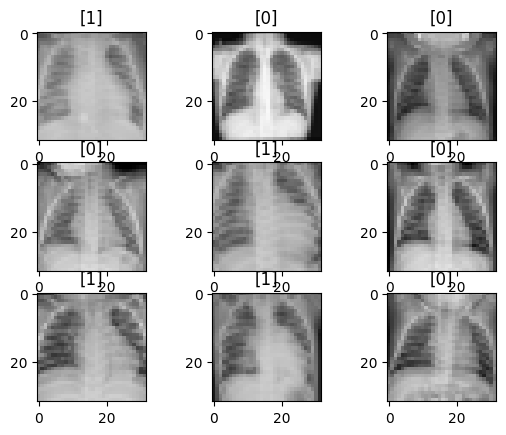

Train: X=(600, 32, 32, 1), y=(600, 1)
Test: X=(600, 32, 32, 1)


In [27]:
# Use np.load to load the data from npz file
### START CODE HERE ###
data = np.load('data.npz')
# print(data)
X_train = data["X_train"]
# X_train = normalize(X_train)
y_train = data["y_train"]
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.01)
# print(len(X_train),len(X_val))
X_test = data["X_test"]
# X_test = normalize(X_test)
### END CODE HERE ###

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i].squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(y_train[i])
# show the figure
plt.show()

# check the shape of training data and testing data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s' % (X_test.shape, ))

In [28]:
#You can split training and validation set here using train_test_split (Optional)
### START CODE HERE ###

### END CODE HERE ###

## 4.2 mini-batch gradient descent

In [29]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape !!!!!!!!!!!(number of examples ,input size)!!!!!!!!!!!
    Y -- true "label" vector, of shape (number of examples, 1)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]  # number of training examples
    mini_batches = []

    # GRADED CODE: Binary classification
    ### START CODE HERE ###

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*inc:(k+1)*inc]
        mini_batch_Y = shuffled_Y[k*inc:(k+1)*inc]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size:m]
        mini_batch_Y = shuffled_Y[num_complete_minibatches*mini_batch_size:m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)


    return mini_batches

    ### END CODE HERE ###

## 4.3 Start training

- Refer to page 5 of the Lab5 slides as a guide to build your model.
- Use ReLU as the activation function in the convolutional block instead of Sigmoid.
- Note that the final convolutional block doesn’t necessarily require a max-pooling layer.

**Note:** If training takes too long, consider reducing the output dimension before the dense layer or increasing the batch size. For example, a dense layer with 10,000 neurons might take around 3 hours to train, while reducing this to 128 neurons or fewer could complete training in about 30 minutes. This is just an approximation—feel free to design the model according to your needs.

In [30]:
### START CODE HERE ###)
learning_rate = 0.01
num_iterations = 10
batch_size = 4
prev_cost = 1
reduce_rate = 0.9
costs = []   # keep track of cost
costs_v = []

# build the model
model = Model()
model.add(Conv(filter_size=3,input_channel=1,output_channel=16,pad=1,stride=1))
model.add(Activation("relu",None))
model.add(MaxPool(pool_size=2,stride=2))
model.add(Conv(filter_size=3,input_channel=16,output_channel=32,pad=1,stride=1))
model.add(Activation("relu",None))
model.add(MaxPool(pool_size=2,stride=2))
model.add(Flatten())
model.add(Dense(2048,512))
model.add(Activation("relu",None))
model.add(Dense(512,1))
model.add(Activation("sigmoid",None))
# Loop (gradient descent)

for i in range(0, num_iterations):
    print("epoch: ",i)
    mini_batches = random_mini_batches(X_train, y_train, batch_size)
    
    for batch in mini_batches:
        x_batch, y_batch = batch
        # print("x",x_batch.shape)

        # forward
        AL = model.forward(x_batch)
        # AL_v = model.forward(X_val)
        # print("AL",AL.shape)
        # compute cost
        cost = compute_BCE_loss(AL=AL,Y=y_batch)
        # cost2 = compute_BCE_loss(AL=AL_v,Y=y_val)

        # backward
        dA_prev = model.backward(AL=AL,Y=y_batch)
        # print("dA",dA_prev.shape)
        # update
        model.update(learning_rate=learning_rate)

    print ("Cost after iteration %i: %f" %(i, cost))
    # print ("Cost val after iteration %i: %f" %(i, cost2))
    if prev_cost > cost :
        prev_cost = cost
        learning_rate *= reduce_rate
    costs.append(cost)
    # costs_v.append(cost2)

### END CODE HERE ###

epoch:  0


KeyboardInterrupt: 

In [487]:
for i in range(0, num_iterations):
    print("epoch: ",i)
    mini_batches = random_mini_batches(X_train, y_train, batch_size)
    
    for batch in mini_batches:
        x_batch, y_batch = batch

        # forward
        AL = model.forward(x_batch)
        # AL_v = model.forward(X_val)

        # compute cost
        cost = compute_BCE_loss(AL=AL,Y=y_batch)
        # cost2 = compute_BCE_loss(AL=AL_v,Y=y_val)

        # backward
        dA_prev = model.backward(AL=AL,Y=y_batch)

        # update
        model.update(learning_rate=learning_rate)

    print ("Cost after iteration %i: %f" %(i, cost))
    # print ("Cost val after iteration %i: %f" %(i, cost2))
    if prev_cost > cost :
        prev_cost = cost
        learning_rate *= reduce_rate
    costs.append(cost)

epoch:  0
Cost after iteration 0: 0.451075
epoch:  1
Cost after iteration 1: 0.039930
epoch:  2
Cost after iteration 2: 0.012866
epoch:  3
Cost after iteration 3: 0.303309
epoch:  4
Cost after iteration 4: 0.061501
epoch:  5
Cost after iteration 5: 0.303607
epoch:  6
Cost after iteration 6: 0.007083
epoch:  7
Cost after iteration 7: 0.003908
epoch:  8
Cost after iteration 8: 0.214803
epoch:  9
Cost after iteration 9: 0.042754


## 4.4 Evaluate your model

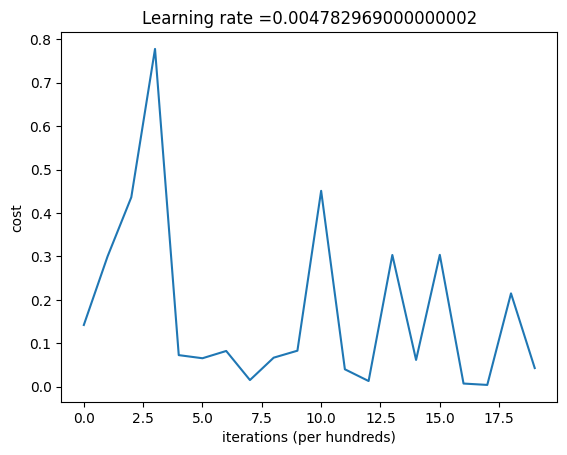

training------
Accuracy: 0.9783333333333334


In [488]:
### START CODE HERE ###
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

print('training------')
pred_train = predict(model, X_train, y_train)
# print('Validating------')
# pred_train = predict(model, X_val, y_val)
### END CODE HERE ###

## 4.5 Generate the prediction
- Remember to submit this to Kaggle

In [489]:
pred_test = predict(model, X_test)
df = pd.DataFrame({
    'ID': range(len(X_test)),
    'Label': pred_test.astype(int).flatten()
})
df.to_csv('Lab5_prediction.csv', index=False, mode='w')

# 5. Generate Lab5_output.npy
- Remember to submit this to eeclass

In [490]:
# sanity check
assert(list(output.keys()) == ['zero_padding', 'conv_single_step', 'conv_forward_1', 'conv_forward_2', 'conv_forward_3','conv_backward_1', 'conv_backward_2', 'conv_backward_3', 'conv_update_1', 'conv_update_2', 'maxpool_forward', 'maxpool_backward', 'flatten_forward', 'flatten_backward', 'model_1', 'model_2', 'model_3', 'model_4'])

In [491]:
np.save("Lab5_output.npy", output)

In [492]:
# sanity check
submit = np.load("Lab5_output.npy", allow_pickle=True).item()
for key, value in submit.items():
    print(str(key) + ": " + str(type(value)))

zero_padding: <class 'numpy.ndarray'>
conv_single_step: <class 'numpy.float64'>
conv_forward_1: <class 'tuple'>
conv_forward_2: <class 'numpy.float64'>
conv_forward_3: <class 'numpy.ndarray'>
conv_backward_1: <class 'tuple'>
conv_backward_2: <class 'numpy.float64'>
conv_backward_3: <class 'numpy.ndarray'>
conv_update_1: <class 'numpy.ndarray'>
conv_update_2: <class 'numpy.ndarray'>
maxpool_forward: <class 'numpy.ndarray'>
maxpool_backward: <class 'numpy.ndarray'>
flatten_forward: <class 'numpy.ndarray'>
flatten_backward: <class 'numpy.ndarray'>
model_1: <class 'numpy.ndarray'>
model_2: <class 'numpy.ndarray'>
model_3: <class 'numpy.ndarray'>
model_4: <class 'numpy.ndarray'>


: 

Expected output:<br>
<small>
zero_padding： <class 'numpy.ndarray'> <br>
conv_single_step： <class 'numpy.float64'> <br>
conv_forward_1： <class 'tuple'> <br>
conv_forward_2： <class 'numpy.float64'> <br>
conv_forward_3： <class 'numpy.ndarray'> <br>
conv_backward_1： <class 'tuple'> <br>
conv_backward_2： <class 'numpy.float64'> <br>
conv_backward_3： <class 'numpy.ndarray'> <br>
conv_update_1： <class 'numpy.ndarray'> <br>
conv_update_2： <class 'numpy.ndarray'> <br>
maxpool_forward： <class 'numpy.ndarray'> <br>
maxpool_backward： <class 'numpy.ndarray'> <br>
flatten_forward： <class 'numpy.ndarray'> <br>
flatten_backward： <class 'numpy.ndarray'> <br>
model_1： <class 'numpy.ndarray'> <br>
model_2： <class 'numpy.ndarray'> <br>
model_3： <class 'numpy.ndarray'> <br>
model_4： <class 'numpy.ndarray'> <br>
</small>